In [3]:
import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sbn

import pandas as pd
from textdistance import levenshtein

import pylev
!pip install pylev

import time
from datetime import datetime

In [156]:
dane_df=pd.read_csv('./data/Dane.csv')

In [157]:
dane_df.head()

,CODIGO DANE,DEPARTAMENTO,MUNICIPIO
0,99,OTRO,NO RESIDENTE EN EL PAIS
1,5001,ANTIOQUIA,MEDELLIN
2,5002,ANTIOQUIA,ABEJORRAL
3,5004,ANTIOQUIA,ABRIAQUI
4,5021,ANTIOQUIA,ALEJANDRIA


In [211]:
dane_df.dtypes

CODIGO DANE      int64
DEPARTAMENTO    object
MUNICIPIO       object
dtype: object

In [4]:
hurto_df = pd.read_csv('./data/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')

In [239]:
hurto_df.dtypes

Unnamed: 0                int64
DEPARTAMENTO             object
MUNICIPIO                object
CODIGO DANE               int64
ARMAS MEDIOS             object
FECHA HECHO      datetime64[ns]
GENERO                   object
GRUPO ETARIO             object
TIPO DE HURTO            object
CANTIDAD                  int64
largo                     int64
LARGO                     int64
dtype: object

In [193]:
hurto_df.shape

(36141, 10)

In [179]:
hurto_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,HUILA,CAMPOALEGRE,41132000,NO REPORTADO,2010-01-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1
1,META,SAN JUAN DE ARAMA,50683000,NO REPORTADO,2010-01-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1
2,BOYACÁ,BELÉN,15087000,NO REPORTADO,2010-02-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1
3,CASANARE,PORE,85263000,NO REPORTADO,2010-02-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1
4,CUNDINAMARCA,MADRID,25430000,ARMA DE FUEGO,2010-03-01,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1


In [212]:
hurto_df.dtypes

DEPARTAMENTO             object
MUNICIPIO                object
CODIGO DANE               int64
ARMAS MEDIOS             object
FECHA HECHO      datetime64[ns]
GENERO                   object
GRUPO ETARIO             object
TIPO DE HURTO            object
CANTIDAD                  int64
largo                     int64
LARGO                     int64
dtype: object

In [23]:
def error_in_format(x):
    try:
        datetime.strptime(x, "%d/%m/%Y")
        return False
    except:
        return True
hurto_df.loc[hurto_df["FECHA HECHO"].apply(error_in_format)]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD,LARGO


In [24]:
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [25]:
hurto_df['FECHA HECHO']=hurto_df['FECHA HECHO'].apply(dateparse)

In [237]:
## Modificación de la fecha
hurto_df['FECHA HECHO']=pd.to_datetime(hurto_df['FECHA HECHO'])

In [163]:
hurto_df['ARMAS MEDIOS'].unique()

array(['NO REPORTA', 'ARMA DE FUEGO', 'ARMA BLANCA / CORTOPUNZANTE',
       'CONTUNDENTES', 'SIN EMPLEO DE ARMAS', 'CORTANTES',
       'CORTOPUNZANTES', 'PUNZANTES', 'ESCOPOLAMINA',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'LLAVE MAESTRA', 'PALANCAS',
       'NO REPORTADO', '-', 'NO REPOTADO'], dtype=object)

In [164]:
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('CORTANTES','ARMA BLANCA / CORTOPUNZANTE')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('PUNZANTES','ARMA BLANCA / CORTOPUNZANTE')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('NO REPOTADO','NO REPORTADO')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('-','NO REPORTADO')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('NO REPORTA','NO REPORTADO')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('LLAVE MAESTRA','CONTUNDENTES')
hurto_df['ARMAS MEDIOS'] = hurto_df['ARMAS MEDIOS'].replace('PALANCAS','CONTUNDENTES')

In [165]:
hurto_df['GENERO'].unique()

array(['FEMENINO', 'MASCULINO', 'NO REPORTA', '-', 'NO APLICA', nan,
       'NO REPORTADO'], dtype=object)

In [7]:
hurto_df['GENERO'] = hurto_df['GENERO'].replace('NO APLICA','NO REPORTADO')
hurto_df['GENERO'] = hurto_df['GENERO'].replace('-','NO REPORTADO')
hurto_df['GENERO'] = hurto_df['GENERO'].replace('NO REPORTA','NO REPORTADO')
hurto_df['GENERO'] = hurto_df['GENERO'].replace('nan','NO REPORTADO')

In [8]:
##n se eliminan los datos nulos de la variable genero
hurto_df['GENERO'].isnull().sum()

0

In [9]:
hurto_df.drop(33907, inplace = True)
hurto_df.drop(33908, inplace = True)
hurto_df.drop(34039, inplace = True)
hurto_df.drop(34042, inplace = True)
hurto_df.drop(34257, inplace = True)
hurto_df.drop(34394, inplace = True)
hurto_df.drop(34415, inplace = True)
hurto_df.drop(34619, inplace = True)
hurto_df.drop(34630, inplace = True)
hurto_df.drop(34972, inplace = True)
hurto_df.drop(35048, inplace = True)
hurto_df.drop(35200, inplace = True)
hurto_df.drop(35201, inplace = True)
hurto_df.drop(35445, inplace = True)
hurto_df.drop(35460, inplace = True)

KeyError: '[33907] not found in axis'

In [ ]:
## se hace la homologacion de nulos a adultos , y no reporta, no repotado a no reportado
hurto_df['GRUPO ETARIO'].unique()

In [172]:
hurto_df['GRUPO ETARIO'].isnull().sum()

230

In [173]:
df1 = hurto_df.groupby(['GRUPO ETARIO'])['CANTIDAD'].sum().sort_values(ascending = False).head
df1

<bound method NDFrame.head of GRUPO ETARIO
ADULTOS         33166
NO REPORTA       3099
NO APLICA         374
MENORES            18
ADOLESCENTES       12
NO REPORTADO        4
Name: CANTIDAD, dtype: int64>

In [174]:
## se reemplaza los nulos (230) por la moda, "ADULTOS"
hurto_df['GRUPO ETARIO'].fillna("ADULTOS",inplace = True)

In [20]:
hurto_df['GRUPO ETARIO'] = hurto_df['GRUPO ETARIO'].replace('NO APLICA','NO REPORTADO')
hurto_df['GRUPO ETARIO'] = hurto_df['GRUPO ETARIO'].replace('NO REPORTA','NO REPORTADO')

In [178]:
## no se hace homologacion en esta variable
hurto_df['TIPO DE HURTO'].unique()

array(['HURTO ABIGEATO', 'HURTO PIRATERÍA TERRESTRE',
       'HURTO ENTIDADES FINANCIERAS'], dtype=object)

In [10]:
## Se solucionaron los datos nulos
hurto_df.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       0
FECHA HECHO        0
GENERO             0
GRUPO ETARIO     230
TIPO DE HURTO      0
CANTIDAD           0
dtype: int64

In [11]:
#Corrección formato DANE 
def fix_dane_lengh(x) :
    x=str(x)
    x=x[:-3]
    return int(x)
hurto_df['CODIGO DANE']=hurto_df['CODIGO DANE'].apply({fix_dane_lengh})

In [12]:
def largo(x) :
    x=len(str(x))
    return (x)
hurto_df['LARGO'] = hurto_df['CODIGO DANE'].apply({largo})

In [13]:
hurto_df['LARGO'].unique()
    

array([5, 4], dtype=int64)

In [201]:
hurto_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD,largo,LARGO
0,HUILA,CAMPOALEGRE,41132,NO REPORTADO,2010-01-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1,36141,5
1,META,SAN JUAN DE ARAMA,50683,NO REPORTADO,2010-01-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1,36141,5
2,BOYACÁ,BELÉN,15087,NO REPORTADO,2010-02-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1,36141,5
3,CASANARE,PORE,85263,NO REPORTADO,2010-02-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1,36141,5
4,CUNDINAMARCA,MADRID,25430,ARMA DE FUEGO,2010-03-01,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1,36141,5


In [208]:
for z in range (0,len(hurto_df)):
    for y in range (0,len(dane_df)):
        if hurto_df['CODIGO DANE'][z]==dane_df['CODIGO DANE'][y]:
            hurto_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
            hurto_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]

C:\Users\Daniela Rubio Garcia\AppData\Local\Temp\ipykernel_28208\1826155170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurto_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
C:\Users\Daniela Rubio Garcia\AppData\Local\Temp\ipykernel_28208\1826155170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurto_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]


KeyError: 33907

In [213]:
hurto_df.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD,largo,LARGO
0,HUILA,CAMPOALEGRE,41132,NO REPORTADO,2010-01-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1,36141,5
1,META,SAN JUAN DE ARAMA,50683,NO REPORTADO,2010-01-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1,36141,5
2,BOYACA,BELÉN,15087,NO REPORTADO,2010-02-01,FEMENINO,ADULTOS,HURTO ABIGEATO,1,36141,5
3,CASANARE,PORE,85263,NO REPORTADO,2010-02-01,MASCULINO,ADULTOS,HURTO ABIGEATO,1,36141,5
4,CUNDINAMARCA,MADRID,25430,ARMA DE FUEGO,2010-03-01,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1,36141,5


In [215]:
## se exporta la base para poder unirla con las otras tres
hurto_df.to_csv('hurto.csv')

1.Seleccione al menos 4 conjuntos de datos y realice un perfilamiento de cada uno. Describa los hallazgos encontrados en cada conjunto de datos. No olvide mencionar su estructura y aspectos relevantes de calidad como campos nulos, departamentos mal escritos, formatos de fechas incorrectos, entre otros. Si no evidencia ningún problema de calidad de datos, también mencionelo.

En el dataset de hurtos por modalidades tenia probelmas de completitud ya que en los campos "genero" y  "grupo etario"  habia datos faltantes los de la primera variable se solucionaron de eliminando los datos ya que eran pocos (15) frente al tamaño de la base, para el segundo se imputo por moda. Adicional tenia problemas con el codigo del dane, municipio y departamento, ya que se encontraban de conformidad pues no estaban escrita de la misma manera las ubicaciones ni el codigo.

In [255]:
hurto_df = pd.read_csv('hurto.csv')

2.Responda la siguientes preguntas para cada uno de los conjuntos de datos seleccionados:

a.¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?
 
 Para dar respuesta  a la pregunta se creo un data frame con las cifras de los ultimos cinco años, es decir, desde incio del 2017 y de allí se realizo el agrupamiento por cantidad de delitos por departamento y observamos que el top 3 de departamentos es Cundinamarca, Cesar y Meta.
 
 

In [26]:
cincoaños_df=hurto_df.loc[hurto_df['FECHA HECHO']>'2017-01-01']

In [15]:
cincoaños_df.groupby(['DEPARTAMENTO'])[['CANTIDAD']].sum().sort_values(by="CANTIDAD", ascending= False).head()

,CANTIDAD
DEPARTAMENTO,
CUNDINAMARCA,2628
CESAR,1520
TOLIMA,1519
ANTIOQUIA,1437
META,1348


b.Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

Teniendo en cuenta la base de los ultimo cinco años trabajada en el punto anterior vemos que los delitos normalmente que los hurtos son cometidos sin empleo de armas, y si vemos la totalidad de la base vemos que el comportamiento es el mismo donde predominan los hurtos sin empleo de armas.

In [227]:
cincoaños_df['ARMAS MEDIOS'].value_counts()

SIN EMPLEO DE ARMAS            12748
ARMA BLANCA / CORTOPUNZANTE     3142
ARMA DE FUEGO                   2082
NO REPORTADO                     727
CONTUNDENTES                     350
ESCOPOLAMINA                      14
Name: ARMAS MEDIOS, dtype: int64

In [228]:
hurto_df['ARMAS MEDIOS'].value_counts()

SIN EMPLEO DE ARMAS                   19984
ARMA DE FUEGO                          5691
ARMA BLANCA / CORTOPUNZANTE            5432
NO REPORTADO                           4513
CONTUNDENTES                            497
ESCOPOLAMINA                             15
CORTOPUNZANTES                            7
ARTEFACTO EXPLOSIVO/CARGA DINAMITA        2
Name: ARMAS MEDIOS, dtype: int64

c.Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Valiendome de una tabla resumen en la que esta por año la cantidad e hurtos cometidos por cada genero y grupo etario, se concluye que en su gran mayoría son cometidos por adultos masculinos con un aparticipacion de mas del 70% porcentaje que no varia muhco año tras año, seguido por las mujeres adultas.

<AxesSubplot:xlabel='GENERO'>

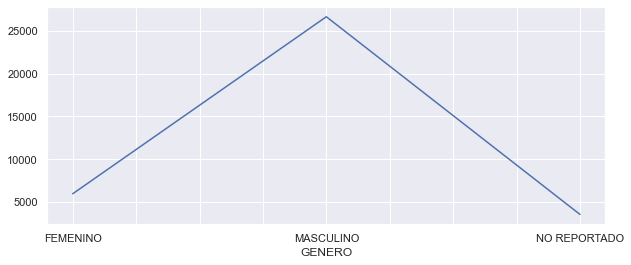

In [16]:
sbn.set(rc={'figure.figsize':(10, 4)})
hurto_df.groupby([hurto_df['GENERO']])['CANTIDAD'].count().plot()
                      

In [17]:
hurto_df.groupby([hurto_df['GENERO']])['CANTIDAD'].count()

GENERO
FEMENINO         5951
MASCULINO       26649
NO REPORTADO     3541
Name: CANTIDAD, dtype: int64

<AxesSubplot:xlabel='GRUPO ETARIO'>

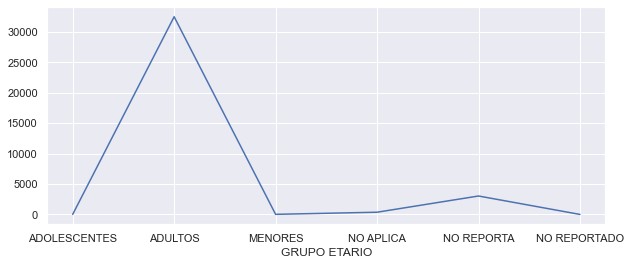

In [18]:
hurto_df.groupby([hurto_df['GRUPO ETARIO']])['CANTIDAD'].count().plot()  

In [21]:
hurto_df.groupby([hurto_df['GRUPO ETARIO']])['CANTIDAD'].count()

GRUPO ETARIO
ADOLESCENTES       12
ADULTOS         32482
MENORES            18
NO REPORTADO     3399
Name: CANTIDAD, dtype: int64

In [263]:
hurto_df['FECHA HECHO'] = pd.to_datetime(hurto_df['FECHA HECHO'], errors='coerce')

In [265]:
años=(cincoaños_df['FECHA HECHO'].dt.year).tolist()
generos=(pd.array(cincoaños_df["GENERO"])).tolist()
grupo=(pd.array(cincoaños_df["GRUPO ETARIO"])).tolist()
dpto=(pd.array(cincoaños_df["DEPARTAMENTO"])).tolist()

In [268]:
cincoaños_df.groupby(cincoaños_df["FECHA HECHO"].dt.year).agg({"CANTIDAD":"count"})

,CANTIDAD
FECHA HECHO,
2017,5563
2018,4406
2019,3724
2020,2589
2021,2333
2022,448


In [ ]:
cincoaños_df.groupby(cincoaños_df["FECHA HECHO"].dt.year).agg({"GENERO":"count"})

In [266]:
(cincoaños_df.groupby([años,generos,grupo])['CANTIDAD'].count())

2017  FEMENINO      ADULTOS          939
                    MENORES            3
      MASCULINO     ADOLESCENTES       2
                    ADULTOS         4202
                    MENORES            4
      NO REPORTADO  NO REPORTADO     413
2018  FEMENINO      ADOLESCENTES       1
                    ADULTOS          764
      MASCULINO     ADOLESCENTES       1
                    ADULTOS         3226
                    MENORES            3
      NO REPORTADO  NO REPORTADO     411
2019  FEMENINO      ADULTOS          664
                    MENORES            2
      MASCULINO     ADOLESCENTES       2
                    ADULTOS         2794
                    MENORES            1
      NO REPORTADO  NO REPORTADO     261
2020  FEMENINO      ADULTOS          452
      MASCULINO     ADULTOS         1912
      NO REPORTADO  ADULTOS          135
                    NO REPORTADO      90
2021  FEMENINO      ADULTOS          444
      MASCULINO     ADOLESCENTES       1
                

¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

 En el mes de Enero es en el que mas hurtos se cometen contrario  a la percepcion de las perosnas que creen que en diciembre es cuando mas hurtos se cometen.


<AxesSubplot:xlabel='MES DEL AÑO'>

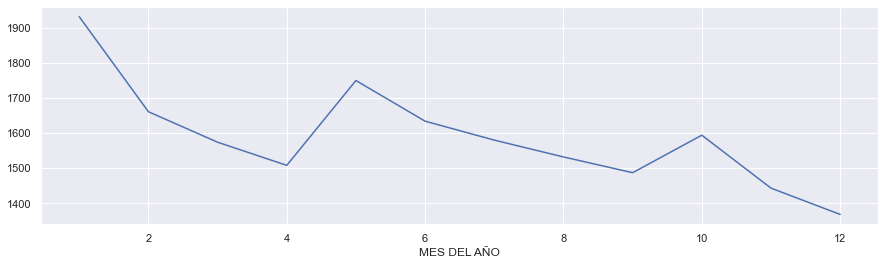

In [269]:
sbn.set(rc={'figure.figsize':(15, 4)})
cincoaños_df.groupby(cincoaños_df["FECHA HECHO"].dt.month)['CANTIDAD'].count().plot(xlabel="MES DEL AÑO")


In [27]:
cincoaños_df.groupby(cincoaños_df["FECHA HECHO"].dt.month)['CANTIDAD'].count()

FECHA HECHO
1     1914
2     1819
3     1635
4     1553
5     1690
6     1627
7     1587
8     1551
9     1528
10    1467
11    1398
12    1294
Name: CANTIDAD, dtype: int64